In [1]:
# importing essential modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing data set:
df = pd.read_csv('weight-height.csv')
df1 = df.copy()
df2 = df.copy()
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
# Label encoding gender feature:
from sklearn.preprocessing import LabelEncoder # importing Label Encoder modules
lben = LabelEncoder() # Create object for Label Encoder 
df1['Gender'] = lben.fit_transform(df1['Gender'])
 
# Standardize Height feature:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
col = ['Height']
df1[col] = std.fit_transform(df1[col])

# Split data for train and test set
from sklearn.model_selection import train_test_split
X = df1.drop(['Weight'], axis=1)
y = df1['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [4]:
# Apply linear regression:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
y_pred = lreg.predict(X_test)

In [5]:
# Evaluate linear regression performance:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE = ", mean_squared_error(y_test, y_pred)) # The mean squared error
print("MAE =", mean_absolute_error(y_test, y_pred)) # The mean absolute error
print ("Traning Accuracy: ", lreg.score(X_train, y_train)) # Check training accuracy
print ("Testing Accuracy: ", lreg.score(X_test, y_test)) # Check testing accuracy

MSE =  99.67250998070028
MAE = 7.982132592729127
Traning Accuracy:  0.8972135459668117
Testing Accuracy:  0.9059959607091161


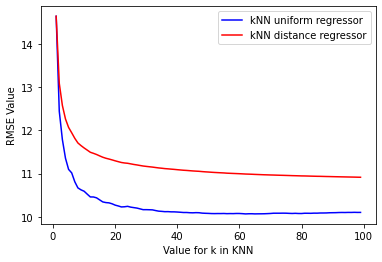

In [32]:
# Finding an appropiate n_neighbors value for kNN regressor by uniform and distance weight function:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
knu = []
knd = []
kr = range(1, 100)
for i in kr:
    knru = KNeighborsRegressor(n_neighbors=i, weights='uniform')
    knru.fit(X_train, y_train)
    pred_knru = knru.predict(X_test)
    knu.append(sqrt(mean_squared_error(y_test, pred_knru)))
    
    knrd = KNeighborsRegressor(n_neighbors=i, weights='distance')
    knrd.fit(X_train, y_train)
    pred_knrd = knrd.predict(X_test)
    knd.append(sqrt(mean_squared_error(y_test, pred_knrd)))

plt.plot(kr, knu, color='blue', label='kNN uniform regressor')
plt.plot(kr, knd, color='red', label='kNN distance regressor')
plt.xlabel('Value for k in KNN')
plt.ylabel('RMSE Value')
plt.legend(loc='best')
plt.show()

In [39]:
# Apply optimised n_neighbors value for kNN regressor with uniform weight function:
knu40 = KNeighborsRegressor(n_neighbors = 40, weights='uniform')
knu40.fit(X_train, y_train)
y_pred40 = knu40.predict(X_test)

print("MSE for kNN uniform: ", mean_squared_error(y_test, y_pred40)) # The mean squared error
print ("Traning Accuracy for kNN uniform: ", knu40.score(X_train, y_train)) # Check training accuracy
print ("Testing Accuracy kNN uniform: ", knu40.score(X_test, y_test)) # Check testing accuracy

MSE for kNN uniform:  102.26676419495851
Traning Accuracy for kNN uniform:  0.898994928127725
Testing Accuracy kNN uniform:  0.9035492442058908


In [44]:
# Apply optimised n_neighbors value for kNN regressor with distance weight function:
knd30 = KNeighborsRegressor(n_neighbors = 30, weights='distance')
knd30.fit(X_train, y_train)
y_pred30 = knd30.predict(X_test)

print("MSE for kNN uniform: ", mean_squared_error(y_test, y_pred30)) # The mean squared error
print ("Traning Accuracy for kNN distance: ", knd30.score(X_train, y_train)) # Check training accuracy
print ("Testing Accuracy kNN distance: ", knd30.score(X_test, y_test)) # Check testing accuracy

MSE for kNN uniform:  124.6951716975556
Traning Accuracy for kNN distance:  1.0
Testing Accuracy kNN distance:  0.8823963616255852


In [45]:
# Split dataset for kNN Classification
feature_data = df2.drop(['Gender'], axis=1)
target_data = df2['Gender']

feature_data = std.fit_transform(feature_data) # standardize feature data
target_data = lben.fit_transform(target_data) # encoded target data

Xtrain, Xtest, ytrain, ytest = train_test_split(feature_data, target_data, test_size=0.3, random_state=1)

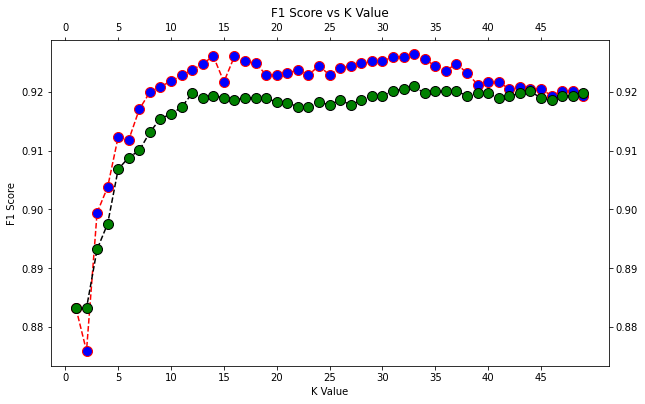

In [48]:
# Finding an appropiate n_neighbors value for kNN classifier by uniform and distance weight function:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
f1s = []
f2s = []
for i in range(1, 50):
    knct = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knct.fit(Xtrain, ytrain)
    pred_i = knct.predict(Xtest)
    f1s.append(f1_score(ytest, pred_i, average='weighted'))
    
    knct2 = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knct2.fit(Xtrain, ytrain)
    pred_i2 = knct2.predict(Xtest)
    f2s.append(f1_score(ytest, pred_i2, average='weighted'))
           
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(range(1, 50), f2s, color='black', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('F1 Score vs K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')
plt.xticks(range(0, 50, 5))
plt.tick_params(labeltop=True, labelright=True, top=True, right=True)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1055
           1       0.94      0.93      0.94      1512

    accuracy                           0.93      2567
   macro avg       0.92      0.92      0.92      2567
weighted avg       0.93      0.93      0.93      2567

MSE for kNN uniform:  0.07401636151149202
Traning Accuracy for kNN uniform:  0.9196726786907148
Testing Accuracy kNN uniform:  0.925983638488508


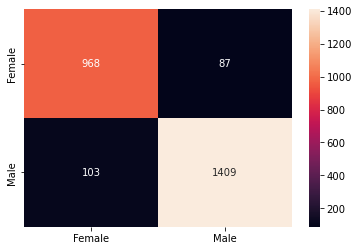

In [49]:
# Apply optimised n_neighbors value for kNN classification with uniform weight function:
knc14 = KNeighborsClassifier(n_neighbors=14, weights='uniform')
knc14.fit(Xtrain, ytrain)
y_pred_knc14 = knc14.predict(Xtest)

# Model Evaluation:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

class_name = ['Female', 'Male']
cm14 = pd.DataFrame(confusion_matrix(ytest, y_pred_knc14), columns=class_name, index=class_name)
sns.heatmap(cm14, annot=True, fmt='d')
print(classification_report(ytest, y_pred_knc14))

print("MSE for kNN uniform: ", mean_squared_error(ytest, y_pred_knc14)) # The mean squared error
print ("Traning Accuracy for kNN uniform: ", knc14.score(Xtrain, ytrain)) # Check training accuracy
print ("Testing Accuracy kNN uniform: ", knc14.score(Xtest, ytest)) # Check testing accuracy

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1055
           1       0.93      0.93      0.93      1512

    accuracy                           0.92      2567
   macro avg       0.92      0.92      0.92      2567
weighted avg       0.92      0.92      0.92      2567

MSE for kNN distance:  0.0802493182703545
Traning Accuracy for kNN distance:  1.0
Testing Accuracy kNN distance:  0.9197506817296455


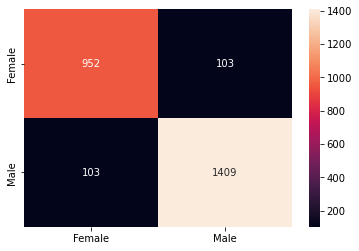

In [50]:
# Apply optimised n_neighbors value for kNN classification with distance weight function:
knc12 = KNeighborsClassifier(n_neighbors=12, weights='distance')
knc12.fit(Xtrain, ytrain)
y_pred_knc12 = knc12.predict(Xtest)

# Model Evaluation:
class_name = ['Female', 'Male']
cm12 = pd.DataFrame(confusion_matrix(ytest, y_pred_knc12), columns=class_name, index=class_name)
sns.heatmap(cm12, annot=True, fmt='d')
print(classification_report(ytest, y_pred_knc12))

print("MSE for kNN distance: ", mean_squared_error(ytest, y_pred_knc12)) # The mean squared error
print ("Traning Accuracy for kNN distance: ", knc12.score(Xtrain, ytrain)) # Check training accuracy
print ("Testing Accuracy kNN distance: ", knc12.score(Xtest, ytest)) # Check testing accuracy

0.9247069259510018 0.9171239875623762


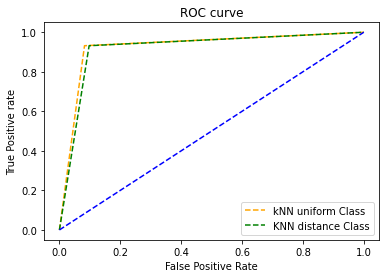

In [51]:
# ROC and AUC evaluation
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
fpr1, tpr1, thresh1 = roc_curve(ytest, y_pred_knc14, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(ytest, y_pred_knc12, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=1)

auc_score1 = roc_auc_score(ytest, y_pred_knc14)
auc_score2 = roc_auc_score(ytest, y_pred_knc12)

print(auc_score1, auc_score2)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='kNN uniform Class')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN distance Class')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();